In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/insurance.csv'
data=pd.read_csv(path)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.duplicated().sum()

1

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
Male = pd.get_dummies(data['sex'],dtype=int,drop_first=True)
# Male
data=pd.concat([data,Male],axis=1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [ ]:
smoker=pd.get_dummies(data["smoker"],dtype=int,drop_first=True)
data=pd.concat([data,smoker],axis=1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [ ]:
data=data.rename(columns={'yes':'Smoker'})

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [ ]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<ipython-input-29-b166ffe75fa6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=data,palette="GnBu")


<Axes: xlabel='sex', ylabel='count'>

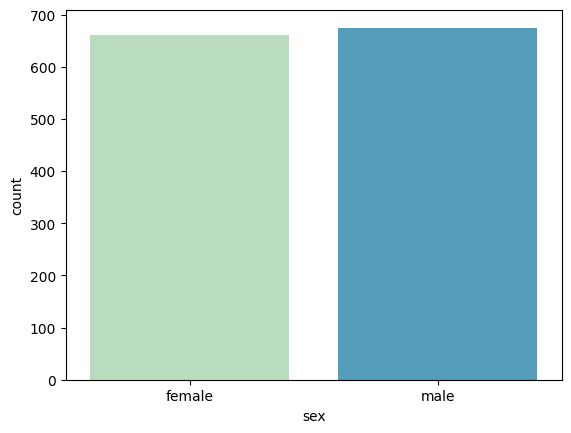

In [ ]:
sns.countplot(x='sex',data=data,palette="GnBu")

In [ ]:
data['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='charges'>

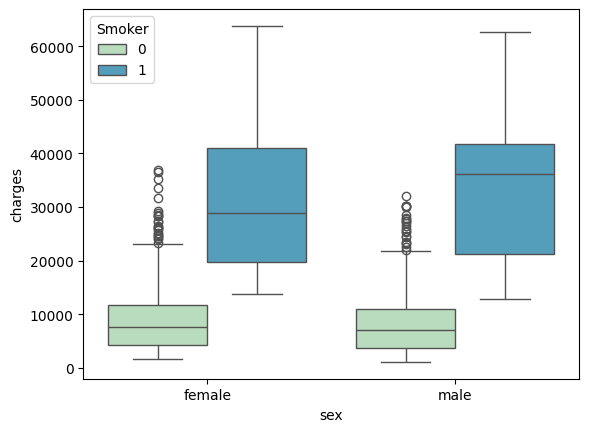

In [ ]:

sns.boxplot(x='sex',y='charges',data=data,palette="GnBu",hue="Smoker")

<Axes: xlabel='age', ylabel='charges'>

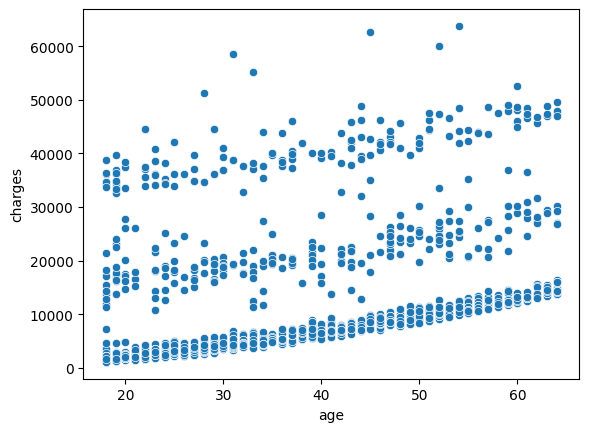

In [ ]:
sns.scatterplot(x="age",y="charges",data=data)

<Axes: xlabel='age', ylabel='charges'>

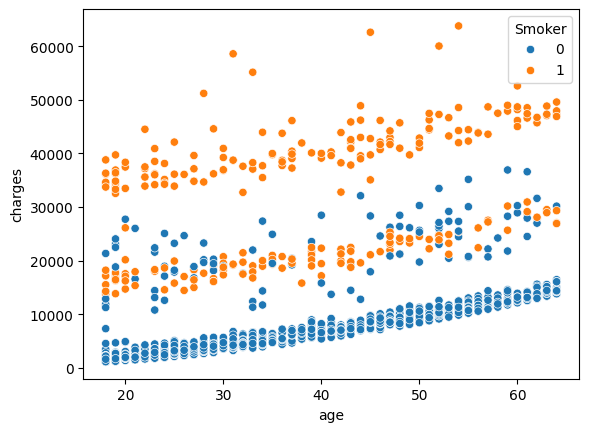

In [ ]:
sns.scatterplot(x="age",y="charges",data=data,hue='Smoker')

<Axes: xlabel='age', ylabel='charges'>

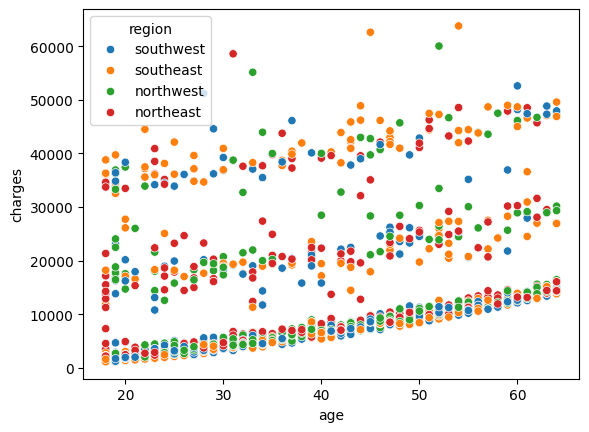

In [ ]:
sns.scatterplot(x="age",y="charges",data=data,hue="region")

<Axes: xlabel='age', ylabel='charges'>

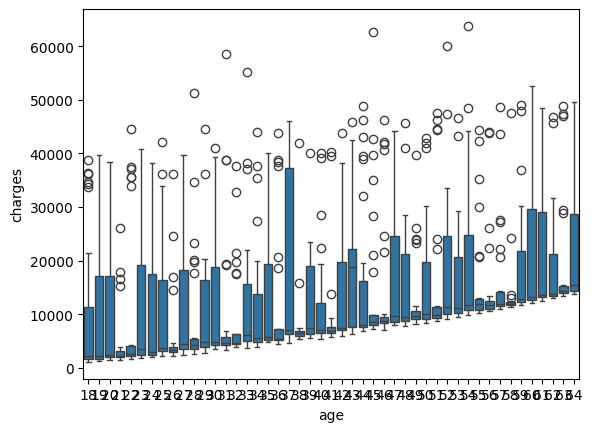

In [ ]:
sns.boxplot(x='age',y='charges',data=data)

<Axes: xlabel='bmi', ylabel='charges'>

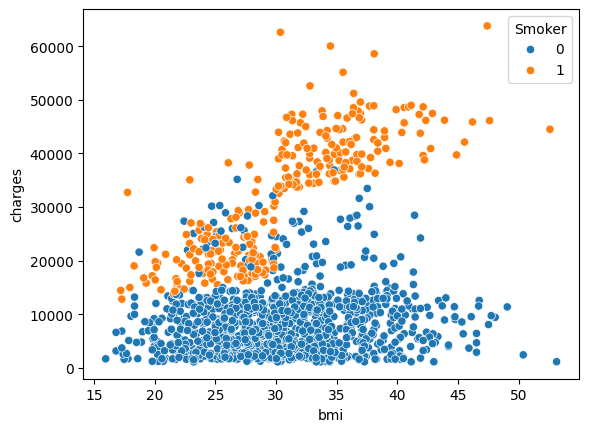

In [ ]:
sns.scatterplot(x="bmi",y="charges",data=data,hue="Smoker")

<Axes: xlabel='bmi', ylabel='charges'>

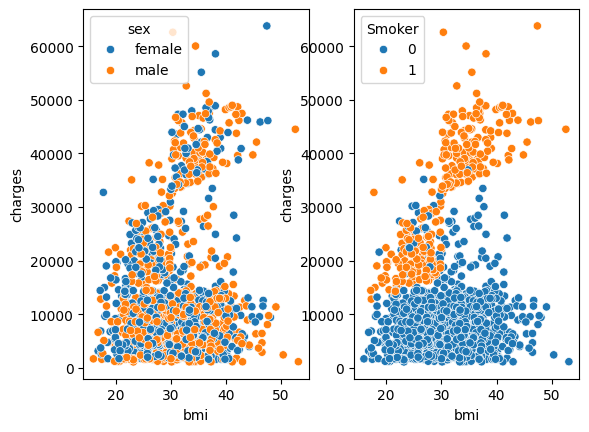

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2)
sns.scatterplot(x="bmi",y="charges",data=data,hue="sex",ax=ax[0])
sns.scatterplot(x="bmi",y="charges",data=data,hue="Smoker",ax=ax[1])

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [ ]:
Region = pd.get_dummies(data['region'],dtype=int)
data=pd.concat([data,Region],axis=1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


In [ ]:
data.drop(['sex','smoker','region'],inplace=True,axis=1)
data.head()

,age,bmi,children,charges,male,Smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


<Axes: >

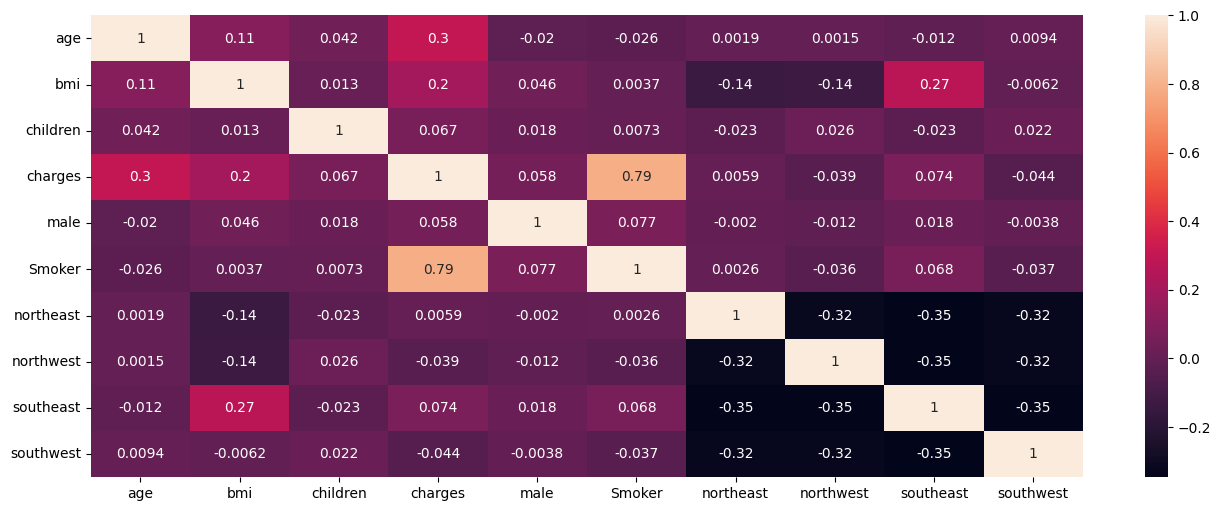

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.corr()

,age,bmi,children,charges,male,Smoker,northeast,northwest,southeast,southwest
age,1.000000,0.109344,0.041536,0.298308,-0.019814,-0.025587,0.001868,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,0.046397,0.003746,-0.138178,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,0.017848,0.007331,-0.023202,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,0.058044,0.787234,0.005945,-0.038695,0.073578,-0.043637
male,-0.019814,0.046397,0.017848,0.058044,1.000000,0.076596,-0.002008,-0.012482,0.017578,-0.003767
Smoker,-0.025587,0.003746,0.007331,0.787234,0.076596,1.000000,0.002597,-0.036321,0.068282,-0.037168
northeast,0.001868,-0.138178,-0.023202,0.005945,-0.002008,0.002597,1.000000,-0.319842,-0.345909,-0.320493
northwest,0.001495,-0.136138,0.026044,-0.038695,-0.012482,-0.036321,-0.319842,1.000000,-0.345909,-0.320493
southeast,-0.012311,0.270057,-0.023492,0.073578,0.017578,0.068282,-0.345909,-0.345909,1.000000,-0.346614
southwest,0.009415,-0.006211,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.320493,-0.346614,1.000000


In [ ]:
data.shape

(1337, 10)

In [ ]:
x=data.drop('charges',axis=1)
y=data['charges']
x,y

(      age     bmi  children  male  Smoker  northeast  northwest  southeast  \
 0      19  27.900         0     0       1          0          0          0   
 1      18  33.770         1     1       0          0          0          1   
 2      28  33.000         3     1       0          0          0          1   
 3      33  22.705         0     1       0          0          1          0   
 4      32  28.880         0     1       0          0          1          0   
 ...   ...     ...       ...   ...     ...        ...        ...        ...   
 1333   50  30.970         3     1       0          0          1          0   
 1334   18  31.920         0     0       0          1          0          0   
 1335   18  36.850         0     0       0          0          0          1   
 1336   21  25.800         0     0       0          0          0          0   
 1337   61  29.070         0     0       1          0          1          0   
 
       southwest  
 0             1  
 1          

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [ ]:
x_train.shape

(802, 9)

In [ ]:
y_train.shape

(802,)

In [ ]:
x_test.shape

(535, 9)

In [ ]:
y_test.shape

(535,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaled_x_train= scaler.fit_transform(x_train)
scaled_x_test= scaler.transform(x_test)
scaled_x_train

array([[-0.5943653 , -0.35243508, -0.06739806, ...,  1.73493516,
        -0.58598941, -0.59751318],
       [ 1.17007418,  0.51749422,  0.76419026, ...,  1.73493516,
        -0.58598941, -0.59751318],
       [ 1.52296208, -1.17491369, -0.89898637, ..., -0.57639042,
        -0.58598941, -0.59751318],
       ...,
       [-1.51187383, -1.24900336, -0.89898637, ..., -0.57639042,
         1.70651549, -0.59751318],
       [-0.38263256, -1.94994161,  1.59577858, ..., -0.57639042,
        -0.58598941, -0.59751318],
       [-1.30014109, -1.40051258, -0.06739806, ..., -0.57639042,
        -0.58598941,  1.67360326]])

In [ ]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(scaled_x_train,y_train)

SVR()

In [ ]:
predict=regressor.predict(scaled_x_test)

In [ ]:
predict.shape

(535,)

In [ ]:
predict[:10]

array([9393.99572869, 9395.24763804, 9358.3298469 , 9356.31415034,
       9367.8974251 , 9395.44996026, 9417.64028131, 9415.10760537,
       9375.19428033, 9378.75480116])

In [ ]:
y_test.tail(10)

1286     3732.62510
863      5458.04645
690      2104.11340
812     11013.71190
367      8017.06115
1263     7337.74800
1028     9850.43200
730     19361.99880
853     11729.67950
384      8302.53565
Name: charges, dtype: float64